In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)
X

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                               174.0                             650.0   
1                               427.0                             826.0   
2                               212.0                             697.0   
3                               429.9                             856.0   
4                               358.0                             649.0   
..                                ...                               ...   
354                            3754.0                            7206.9   
355                             648.0                            1422.0   
356                            2250.2                            5166.0   
357                            1652.0                            5113.0   
358                             267.0                             633.0   

     original_firstorder_Energy  original_firstorder_Entropy  \
0                  2.588828e+09                     4.300822   
1                  1.555094e+09                     4.670797   
2                  6.472778e+09                     4.796344   
3                  6.238777e+09                     4.777974   
4                  1.212578e+10                     4.199889   
..                          ...                          ...   
354                1.021032e+12                     7.652972   
355                2.668548e+10                     5.384028   
356                2.305284e+11                     7.453490   
357                6.660589e+11                     7.591514   
358                1.229713e+10                     4.406721   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                     324.0                      2.196185   
1                                     229.5                      2.685919   
2                                     283.0                      2.510939   
3                                     210.0                      4.546907   
4                                     143.0                      3.011379   
..                                      ...                           ...   
354                                  1937.0                      2.885087   
355                                   463.0                      3.096456   
356                                  1575.5                      2.531188   
357                                  2107.0                      2.602830   
358                                   182.0                      3.188866   

     original_firstorder_Maximum  original_firstorder_Mean  \
0                         1085.0                357.892864   
1                         1077.0                626.103994   
2                         1170.0                459.821288   
3                         1463.0                633.593407   
4                         1056.0                508.111091   
..                           ...                       ...   
354                      11777.0               5592.867096   
355                       2749.0                993.503008   
356                       7216.0               3680.912932   
357                       8575.0               3346.971976   
358                       1077.0                445.751146   

     original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
0                                   169.490477                       256.0   
1                                   128.342289                       632.0   
2                                   154.048324                       457.0   
3                                   134.813886                       612.0   
4                                    88.454307                       511.0   
..                                         ...                         ...   
354                                1065.960253                      5670.0   
355                                 246.6

# 1. Data preparation and visualisation
We observe a clear imbalance in the data

In [3]:
y['diagnostic'].value_counts()

HGG    283
LGG     76
Name: diagnostic, dtype: int64

## 1.1 Oversampling in the train dataset

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [4]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [5]:
X_over, y_over = oversample.fit_resample(X, y)

In [6]:
X_over.columns

Index(['original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Median', 'original_firstorder_Minimum',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
       'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
       'original_glcm_ClusterTendency', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_

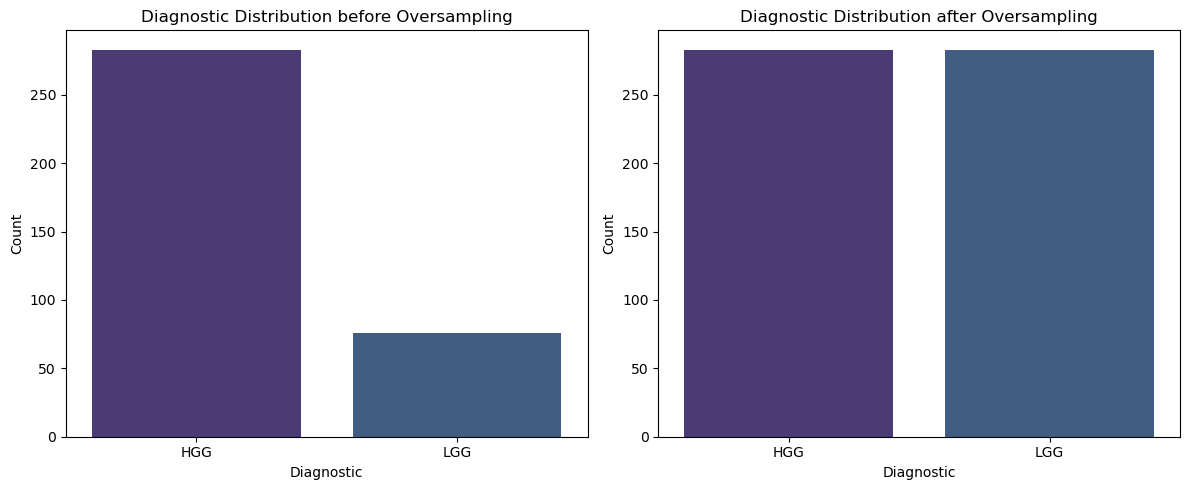

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to use Viridis color palette
sns.set_palette("viridis")

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First count plot - before oversampling
sns.countplot(x="diagnostic", data=y, ax=axes[0])
axes[0].set_title("Diagnostic Distribution before Oversampling")
axes[0].set_xlabel("Diagnostic")
axes[0].set_ylabel("Count")

# Second count plot - after oversampling
sns.countplot(x="diagnostic", data=y_over, ax=axes[1])
axes[1].set_title("Diagnostic Distribution after Oversampling")
axes[1].set_xlabel("Diagnostic")
axes[1].set_ylabel("Count")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## 1.2 Scale the data
As we can observe in the df, the data is in different units and magnitudes. It's essential to have it standarised.

In [8]:
X_cols = X_over.columns

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_over)

In [10]:
X = pd.DataFrame(X, columns=X_cols)
X.head()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                         -0.426023                         -0.324244   
1                         -0.211124                         -0.241576   
2                         -0.393746                         -0.302168   
3                         -0.208660                         -0.227485   
4                         -0.269733                         -0.324714   

   original_firstorder_Energy  original_firstorder_Entropy  \
0                   -0.251377                    -0.049402   
1                   -0.253880                     0.184302   
2                   -0.241974                     0.263607   
3                   -0.242541                     0.252003   
4                   -0.228288                    -0.113159   

   original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                               -0.094458                     -0.554215   
1                               -0.234477                     -0.427902   
2                               -0.155207                     -0.473033   
3                               -0.263370                      0.052084   
4                               -0.362642                     -0.343960   

   original_firstorder_Maximum  original_firstorder_Mean  \
0                    -0.369440                 -0.395199   
1                    -0.371987                 -0.227508   
2                    -0.342378                 -0.331471   
3                    -0.249093                 -0.222826   
4                    -0.378673                 -0.301280   

   original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  ...  \
0                                  -0.132823                   -0.457916  ...   
1                                  -0.254358                   -0.214631  ...   
2                                  -0.178433                   -0.327862  ...   
3                                  -0.235244                   -0.227572  ...   
4                                  -0.372171                   -0.292922  ...   

   original_shape_Maximum2DDiameterColumn  \
0                               -0.636893   
1                               -1.666448   
2                               -0.454219   
3                                0.821594   
4                                0.207607   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                            -0.895017                              -1.005669   
1                            -1.631362                              -1.563702   
2                            -0.553210                              -0.547999   
3                            -1.041835                              -0.069042   
4                            -0.002941                               0.185663   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
0                         -1.072103                  -0.747310   
1                         -1.674801                  -1.034403   
2                         -0.742545                  -0.489785   
3                          0.072570                  -0.779615   
4                         -0.099735                  -0.053192   

   original_shape_MinorAxisLength  original_shape_Sphericity  \
0                       -0.660505                   1.339393   
1                       -1.514528                   0.763914   
2                       -0.049983                   0.974824   
3                       -0.893382                  -0.352217   
4                        0.440791                  -0.031903   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
0                   -0.841719                          -0.259405   
1                   -1.164216                           1.226326   
2                   -0.566865                          -0.476557   
3                   -0.701127                           0.461067   
4           

In [11]:
X.to_csv("X_scaled.csv", index=False)
y_over.to_csv("y_over.csv", index=False)

# 2. Correlation of variables

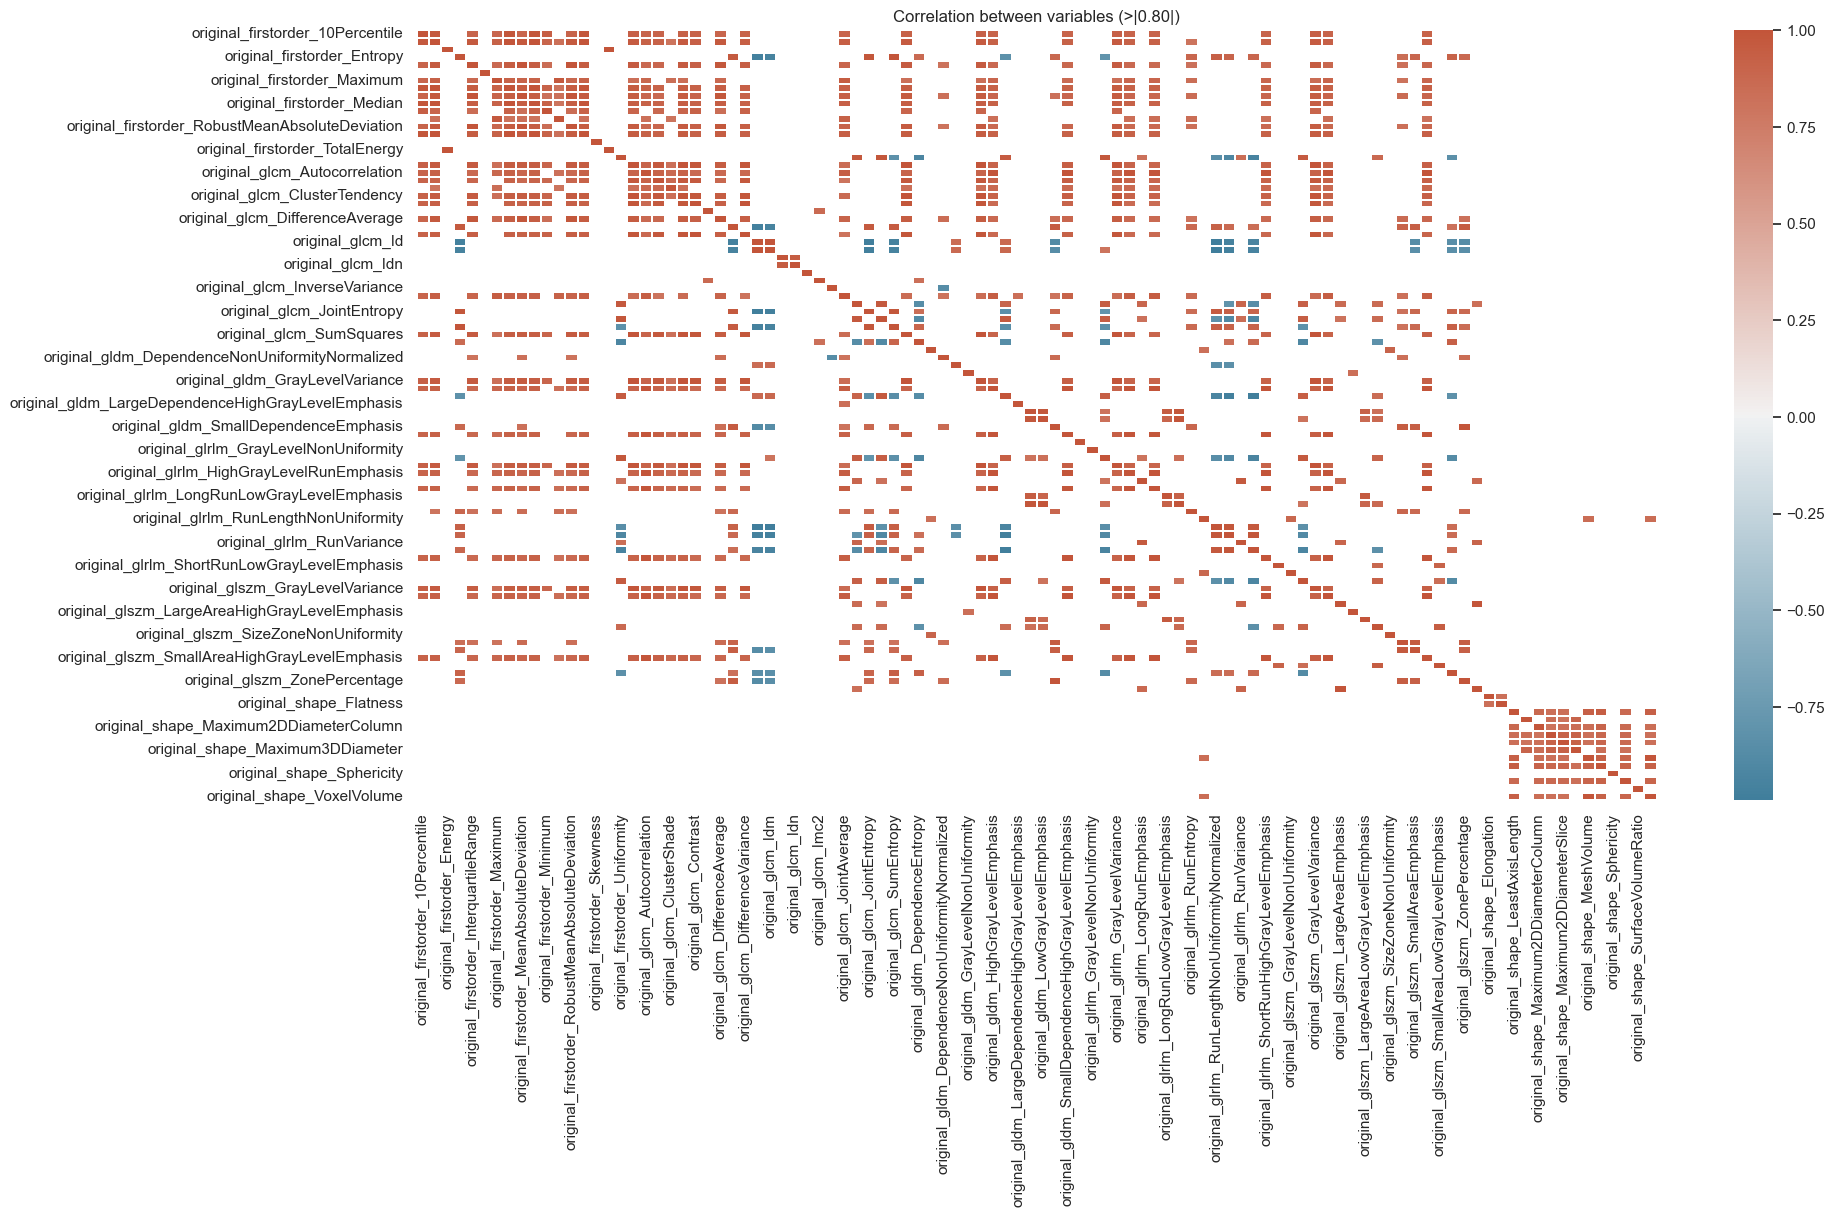

In [12]:
correlation = X.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
masked_corr_matrix = correlation[(correlation > 0.80) | (correlation < -0.80)]
plt.figure(figsize=(20, 10))
sns.heatmap(masked_corr_matrix, 
            cmap=cmap, 
            annot=False, 
            fmt='.2f', 
            linewidths=.05).set_title("Correlation between variables (>|0.80|)")
plt.show()

## 2.1 Clustering + PCA
https://realpython.com/k-means-clustering-python/

In [13]:
import urllib
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(y.diagnostic)
true_labels[:5]

array([0, 0, 0, 0, 0])

In [15]:
n_clusters = len(label_encoder.classes_)
n_clusters

2

In [16]:
preprocessor = Pipeline(
[("pca", PCA(n_components=2, random_state=42)),])

In [17]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [18]:
#pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [19]:
preprocessed_data = pipe["preprocessor"].transform(X)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.7461750629444674

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(X),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))

scat = sns.scatterplot(
    x="component_1",  # Specify the x-axis data
    y="component_2",  # Specify the y-axis data
    s=20,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering + PCA"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


# 3. Features selection and reduction

In [20]:
from sklearn.decomposition import PCA
#we want to preserve the 95% of variability of data
pca = PCA(.95)
components = pca.fit_transform(X)
pca2 = pca.fit_transform(X)

In [21]:
import numpy as np
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)

VarPerc  cumVarPerc
0   41.388880   41.388880
1   19.364988   60.753868
2   13.762503   74.516372
3    6.316084   80.832455
4    2.909951   83.742407
5    2.507889   86.250296
6    2.082382   88.332677
7    1.853402   90.186080
8    1.482827   91.668907
9    1.355711   93.024619
10   0.892268   93.916887
11   0.819869   94.736756
12   0.720525   95.457281

The new X dataset will be:

In [22]:
principal_df = pd.DataFrame(data = pca2
             , columns = ["PCA"+str(i+1) for i in range(len(expVar))])
principal_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -0.784253 -0.992749 -3.480737 -0.053606 -1.345026  0.876183 -0.321354   
1     0.470092 -1.074385 -6.360080  1.359807 -2.262404  1.162179 -0.360077   
2    -0.001262 -1.875837 -2.511363  0.705136 -1.930018  0.707716 -0.590404   
3     0.336902 -2.013866 -2.854187  2.308976  2.272745 -2.040252  0.589641   
4    -1.010545 -2.013062 -0.566071  0.351012 -0.536205 -0.323606 -0.711429   
..         ...       ...       ...       ...       ...       ...       ...   
561   2.889137 -2.653536  1.538621  2.857227  1.124216  0.178442  2.215775   
562  -3.857117  0.776427 -2.202076 -2.754334 -0.362648  1.625506 -0.021818   
563  11.692607  1.976901 -2.638097  1.007318 -1.463896 -1.047579  0.999114   
564   4.538874 -3.745591  6.478229  4.474713 -0.932683 -0.632978 -1.357827   
565  -4.620742  0.170980  6.730105 -3.560635 -1.777626 -1.583197 -1.347289   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  
0   -0.037972  0.863904 -0.128831 -0.819229  0.323459  0.072399  
1   -1.408379  0.780387 -1.768537  0.620800 -0.249848 -0.913939  
2   -0.174229  0.570026 -0.436371 -0.073268  0.330079  0.052755  
3   -0.320064  0.127734 -0.295001 -1.375649  0.535500  0.582263  
4   -0.301364 -0.609924 -1.256325  0.076574  0.089327  0.543954  
..        ...       ...       ...       ...       ...       ...  
561  1.693737  1.343873  0.244352  0.085821 -0.626567  0.291978  
562  0.056208 -0.780945 -0.440826 -1.047554 -0.307212  0.607923  
563  0.159343 -0.620728  2.452600 -0.336915 -0.788863 -1.115987  
564 -0.667174  0.922570 -0.163583  2.324148 -2.092538  0.970296  
565 -0.867518  0.447173 -0.207432 -0.340853 -0.314369 -1.868508  

[566 rows x 13 columns]

<Figure size 640x480 with 0 Axes>

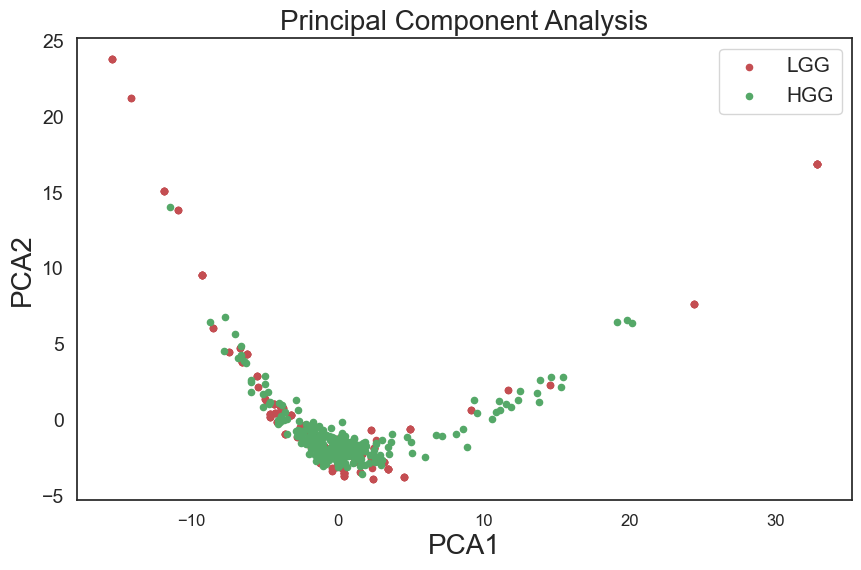

In [23]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA1',fontsize=20)
plt.ylabel('PCA2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['LGG', 'HGG']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y_over['diagnostic'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PCA1']
               , principal_df.loc[indicesToKeep, 'PCA2'], c = color, s = 20)

plt.legend(targets,prop={'size': 15})

Looking at this plot, the principal components are not able to separate both populations: LGG and HGG. However, we will make some experiments using PCA as a feature reduction method.

# 3. Explainable models (JUST PROVES)
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

## 3.0 Train and test split

In [24]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_over, test_size=0.20, random_state=11)
X_train2, X_test2, y_train2, y_test2 = train_test_split(principal_df, y_over, test_size=0.20, random_state=11)
# line below necessary for using f1-score
#y_test1 = y_test1.replace('LGG',0).replace('HGG',1)
X_train1.head()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
74                          -0.264636                         -0.321426   
243                          0.052192                         -0.103483   
214                         -0.536446                         -0.564733   
486                         -0.199232                         -0.264122   
442                          2.989438                          3.085343   

     original_firstorder_Energy  original_firstorder_Entropy  \
74                    -0.245140                    -0.061958   
243                   -0.089977                     0.035034   
214                   -0.256805                    -1.138987   
486                   -0.163627                     0.008852   
442                    8.139527                     2.237213   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
74                                -0.374496                      0.207801   
243                               -0.212992                     -0.563416   
214                               -0.491549                      0.148015   
486                               -0.331527                      0.234766   
442                                2.372543                      0.301647   

     original_firstorder_Maximum  original_firstorder_Mean  \
74                     -0.241452                 -0.302950   
243                    -0.210251                 -0.033833   
214                    -0.611089                 -0.565750   
486                    -0.079398                 -0.249001   
442                     5.019427                  3.070088   

     original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
74                                   -0.358750                   -0.301981   
243                                  -0.271109                   -0.017933   
214                                  -0.538872                   -0.575029   
486                                  -0.313742                   -0.258630   
442                                   2.960633                    3.035416   

     ...  original_shape_Maximum2DDiameterColumn  \
74   ...                               -0.319721   
243  ...                                0.645127   
214  ...                               -0.224525   
486  ...                                1.340480   
442  ...                                2.112188   

     original_shape_Maximum2DDiameterRow  \
74                              0.871405   
243                             1.007884   
214                             0.267792   
486                             1.720441   
442                             0.627176   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
74                               -1.028688                          0.764169   
243                               0.950733                          0.829577   
214                               0.304124                          0.035962   
486                               1.647286                          1.452890   
442                               1.265824                          1.300809   

     original_shape_MeshVolume  original_shape_MinorAxisLength  \
74                   -0.667706                       -0.867159   
243                   0.728838                        0.799022   
214                  -0.186256                        0.002522   
486                   1.386325                        0.932187   
442                   1.100984                        1.259039   

     original_shape_Sphericity  original_shape_SurfaceArea  \
74                   -0.591234                   -0.516416   
243                  -0.755418                    0.922042   
214                  -0.503894                    0.001248   
486                  -0.163874                    1.125418   
442                  -2.475080                    2.731080   

     original_shape_SurfaceVolumeRa

In [25]:
"""
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), k_features=8, 
                 forward=True, 
                 floating=False,
                 verbose=2,               
                 scoring='f1_macro',
                 cv=scv,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train1, y_train1)
selected_features = X_train1.columns[list(sfs.k_feature_idx_)]
print(selected_features)
"""

"\n# create the SequentialFeatureSelector object\nsfs = SequentialFeatureSelector(LogisticRegression(C=10,\nmax_iter=10000), k_features=8, \n                 forward=True, \n                 floating=False,\n                 verbose=2,               \n                 scoring='f1_macro',\n                 cv=scv,\n                 n_jobs=-1)\n# fit the object to the training data\nsfs = sfs.fit(X_train1, y_train1)\nselected_features = X_train1.columns[list(sfs.k_feature_idx_)]\nprint(selected_features)\n"

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), k_features=8, 
                 forward=True, 
                 floating=False,
                 verbose=2,               
                 scoring='f1_macro',
                 cv=5,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train1, y_train1)
selected_features = X_train1.columns[list(sfs.k_feature_idx_)]
print(selected_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/francescocapoccello/opt/anaconda3/lib/pyt

Index(['original_firstorder_Uniformity', 'original_glcm_Contrast',
       'original_glcm_Idmn', 'original_glcm_MaximumProbability',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_shape_SurfaceVolumeRatio'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    0.8s finished

[2024-01-04 20:09:37] Features: 8/8 -- score: 0.8713339287560972

In [62]:
X_train3 = X_train1[selected_features]
X_test3 = X_test1[selected_features]

In [27]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# helper function for evaluating a given classifier
def evaluate_classifier(y_test,pred):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.grid(False)
    plt.show()

In [28]:
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score,labels=['LGG','HGG'], average="binary", pos_label="HGG")
#scorer = make_scorer(accuracy_score)

## 3.1 Random Forest Classifier

### A. With no preprocessing

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [36]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_rfc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best Score: 0.9466469739032262


The optimal configuration is `n_estimators=100`, `max_features=log2`, `max_depth=7` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [37]:
rf1 = RandomForestClassifier(max_depth=7, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf1.fit(X_train1, y_train1.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)

In [38]:
#save the model to not run everything from scratch
dump(rf1, 'RF1.joblib')

['RF1.joblib']

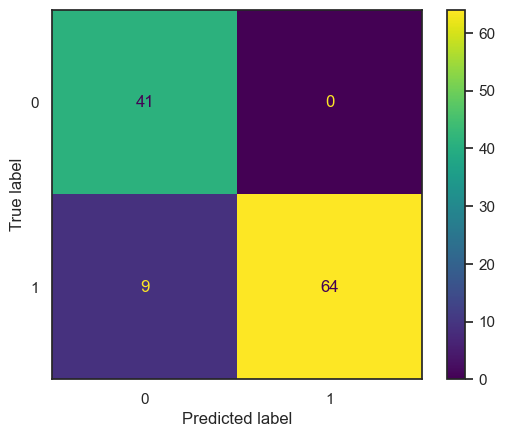

None
              precision    recall  f1-score   support

         HGG       0.82      1.00      0.90        41
         LGG       1.00      0.88      0.93        73

    accuracy                           0.92       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.92      0.92       114



In [39]:
rf1 = load('RF1.joblib')
y_pred = rf1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

Variable Importance Plot - Global Interpretation


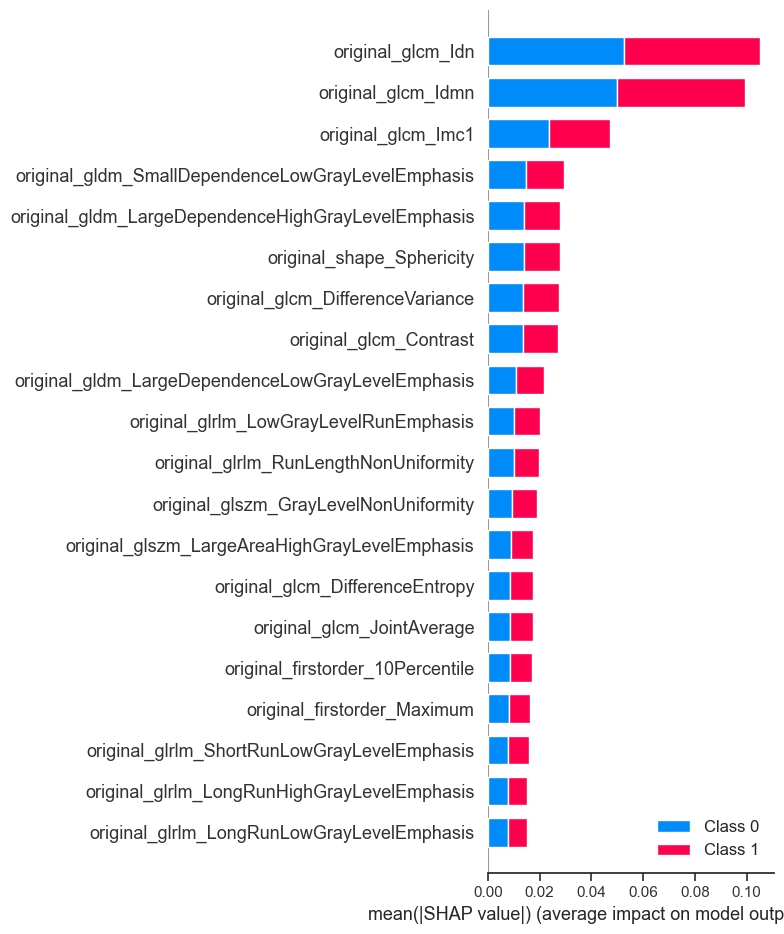

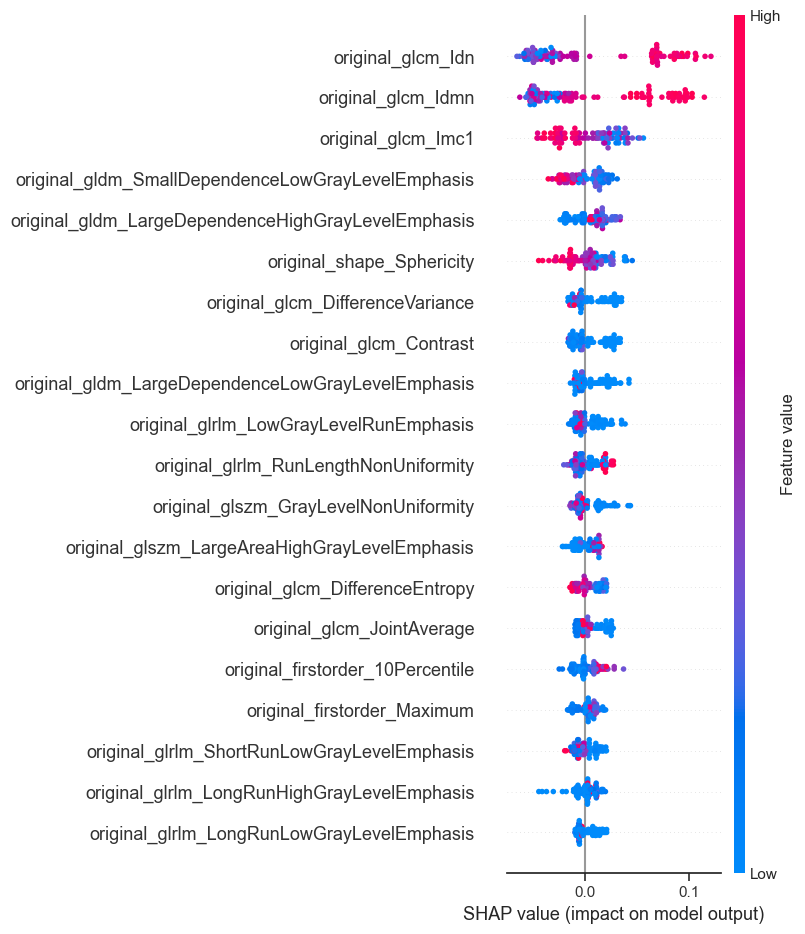

In [41]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf1)
shap_values = explainer.shap_values(X_test1)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test1)
shap.summary_plot(shap_values[1], X_test1)

### B. Features selection with PCA

In [42]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_rfc1.fit(X_train2, y_train2.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
Best Score: 0.9329193029193028


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [43]:
rf2 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf2.fit(X_train2, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)

In [44]:
#save the model to not run everything from scratch 
dump(rf2, 'RF2.joblib')

['RF2.joblib']

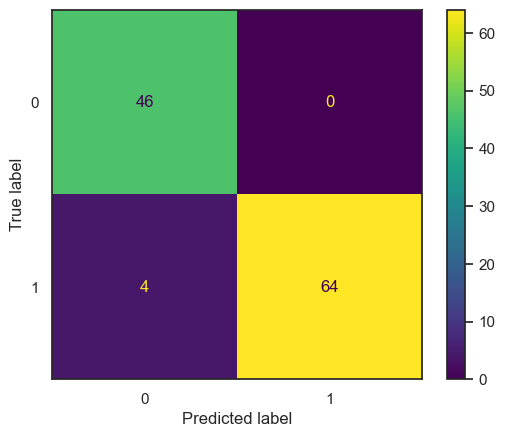

None
              precision    recall  f1-score   support

         HGG       0.92      1.00      0.96        46
         LGG       1.00      0.94      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [45]:
rf2 = load('RF2.joblib')
y_pred2 = rf2.predict(X_test2)
# Classification Report
print(evaluate_classifier(y_pred2, y_test1))
print(classification_report(y_pred2, y_test1))

## C. Features selection with Logistic Regression

In [46]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_rfc1.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9426082161566033


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [47]:
rf3 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="sqrt", n_estimators=500)
rf3.fit(X_train3, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [48]:
#save the model to not run everything from scratch 
dump(rf3, 'RF3.joblib')

['RF3.joblib']

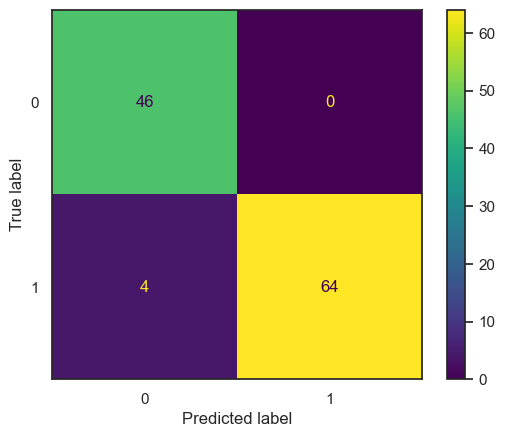

None
              precision    recall  f1-score   support

         HGG       0.92      1.00      0.96        46
         LGG       1.00      0.94      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [49]:
rf3 = load('RF3.joblib')
y_pred3 = rf3.predict(X_test3)
# Classification Report
print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

## 3.2 Logistic Regression Classifier

## A. With no preprocessing

In [50]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,5,10,20,25],
    'multi_class': ['auto', 'ovr', 'multinomial']
    
}

CV_lrc1 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_lrc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_lrc1.best_params_)
print("Best Score:", CV_lrc1.best_score_)

Best Parameters: {'C': 20, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best Score: 0.9259366292086154


The optimal configuration is `C: 20`, `multi_class: multinomial`, `solver: newton-cg`. We train the model again and we save it to not build it from scratch.

In [51]:
lr1 = LogisticRegression(solver='liblinear')
lr1.fit(X_train1, y_train1.diagnostic)

LogisticRegression(solver='liblinear')

In [52]:
#save the model to not run everything from scratch
dump(lr1, 'LR1.joblib')

['LR1.joblib']

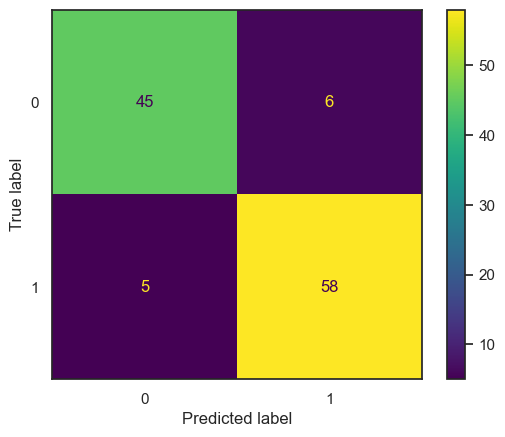

None
              precision    recall  f1-score   support

         HGG       0.90      0.88      0.89        51
         LGG       0.91      0.92      0.91        63

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [53]:
lr1 = load('LR1.joblib')
y_pred = lr1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

In [54]:
f1_score(y_test1,y_pred, average="binary", pos_label="HGG")

0.8910891089108911

## B. Features selection with PCA

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.005,0.01,0.1,0.5,1,3],
    'multi_class': ['auto', 'ovr', 'multinomial']
    
}

CV_lrc2 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_lrc2.fit(X_train2, y_train1.diagnostic)
print("Best Parameters:", CV_lrc2.best_params_)
print("Best Score:", CV_lrc2.best_score_)

Best Parameters: {'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Score: 0.8117957832529825


The optimal configuration is `C: 0.01`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [56]:
lr2 = LogisticRegression(solver='liblinear')
lr2.fit(X_train2, y_train1.diagnostic)

LogisticRegression(solver='liblinear')

In [57]:
#save the model to not run everything from scratch
dump(lr2, 'LR2.joblib')

['LR2.joblib']

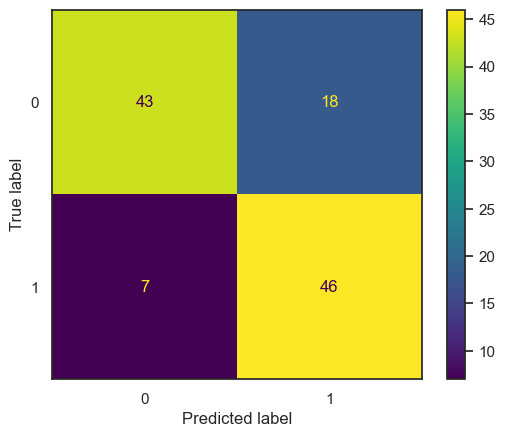

None
              precision    recall  f1-score   support

         HGG       0.86      0.70      0.77        61
         LGG       0.72      0.87      0.79        53

    accuracy                           0.78       114
   macro avg       0.79      0.79      0.78       114
weighted avg       0.79      0.78      0.78       114



In [58]:
lr2 = load('LR2.joblib')
y_pred = lr2.predict(X_test2)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

## C. Features selection with Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,1.5,2,],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

CV_lrc3 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_lrc3.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_lrc3.best_params_)
print("Best Score:", CV_lrc3.best_score_)

Best Parameters: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Score: 0.8476075670742873


The optimal configuration is `C: 1`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [60]:
lr3 = LogisticRegression(solver='liblinear')
lr3.fit(X_train3, y_train1.diagnostic)

LogisticRegression(solver='liblinear')

In [61]:
#save the model to not run everything from scratch
dump(lr3, 'LR3.joblib')

['LR3.joblib']

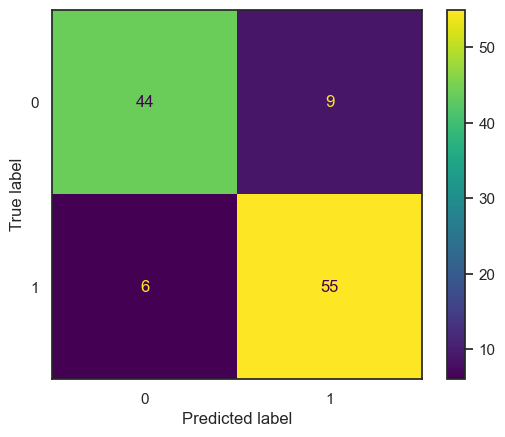

None
              precision    recall  f1-score   support

         HGG       0.88      0.83      0.85        53
         LGG       0.86      0.90      0.88        61

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [62]:
lr1 = load('LR3.joblib')
y_pred = lr3.predict(X_test3)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### Decison Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


#### No preprocess

In [35]:
from sklearn.model_selection import GridSearchCV

dt1_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': list(range(2, 11)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 5, 10],  
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object
CV_dt_clf = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring=scorer)

# Fit the model to the training data
CV_dt_clf.fit(X_train1, y_train1.diagnostic)

# Print the best parameters and best score
print("Best Parameters:", CV_dt_clf.best_params_)
print("Best Score:", CV_dt_clf.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20}
Best Score: 0.9006258234519103


In [36]:
# Create a Decision Tree classifier with the best parameters
dt1_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    random_state=42
)

# Fit the model to the training data
dt1_clf.fit(X_train1, y_train1.diagnostic)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

In [37]:
dump(dt1_clf, 'DT1.joblib')

['DT1.joblib']

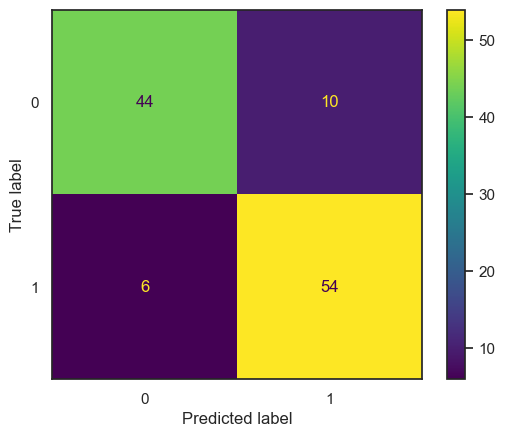

None
              precision    recall  f1-score   support

         HGG       0.88      0.81      0.85        54
         LGG       0.84      0.90      0.87        60

    accuracy                           0.86       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.86      0.86      0.86       114



In [39]:
dt1 = load('DT1.joblib')
y_pred_dt = dt1.predict(X_test1)

print(evaluate_classifier(y_pred_dt, y_test1))
print(classification_report(y_pred_dt, y_test1))

In [55]:
f1_score(y_test1,y_pred_dt, average="binary", pos_label="HGG")

0.8461538461538461

In [41]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.9/450.9 kB 4.6 MB/s eta 0:00:0000:0100:01


Variable Importance Plot - Global Interpretation


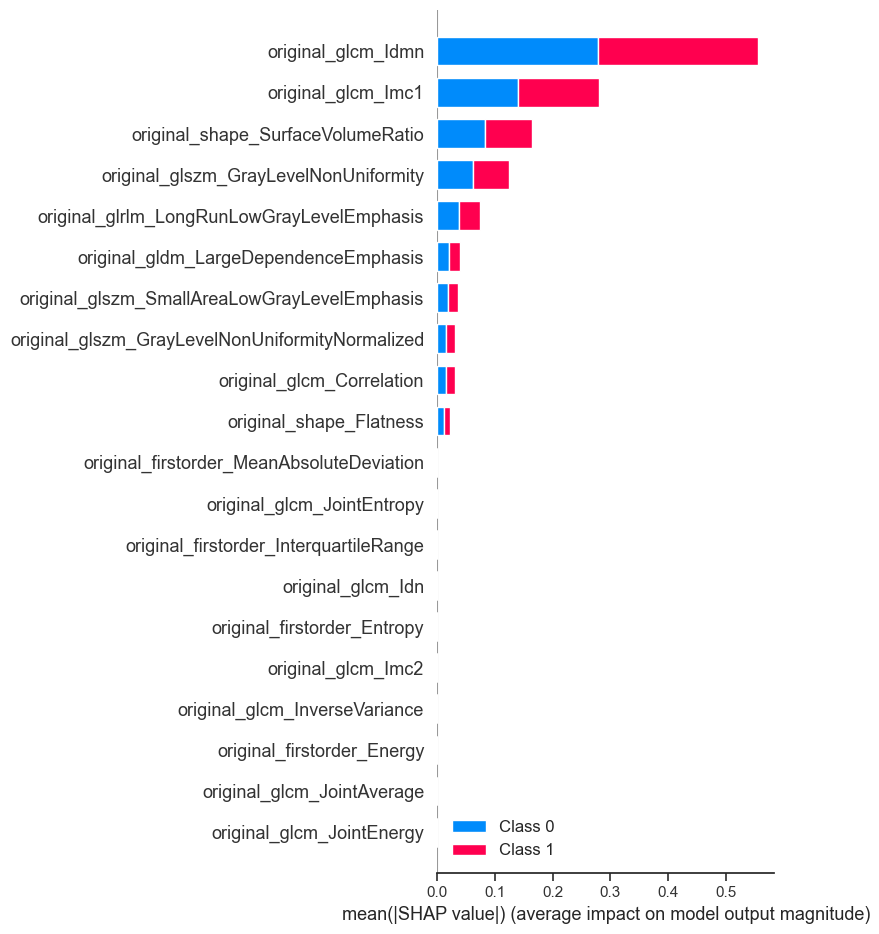

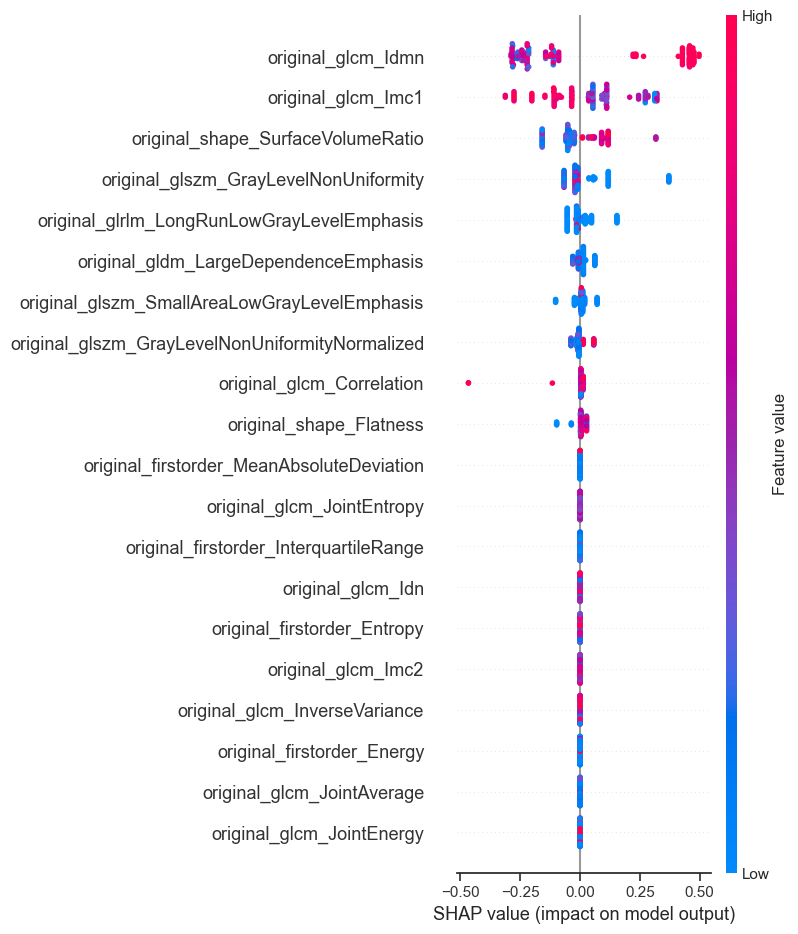

In [43]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer_dt = shap.TreeExplainer(dt1_clf)
shap_values_dt = explainer_dt.shap_values(X_test1)

# Plot summary plots
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values_dt, X_test1)
shap.summary_plot(shap_values_dt[1], X_test1)


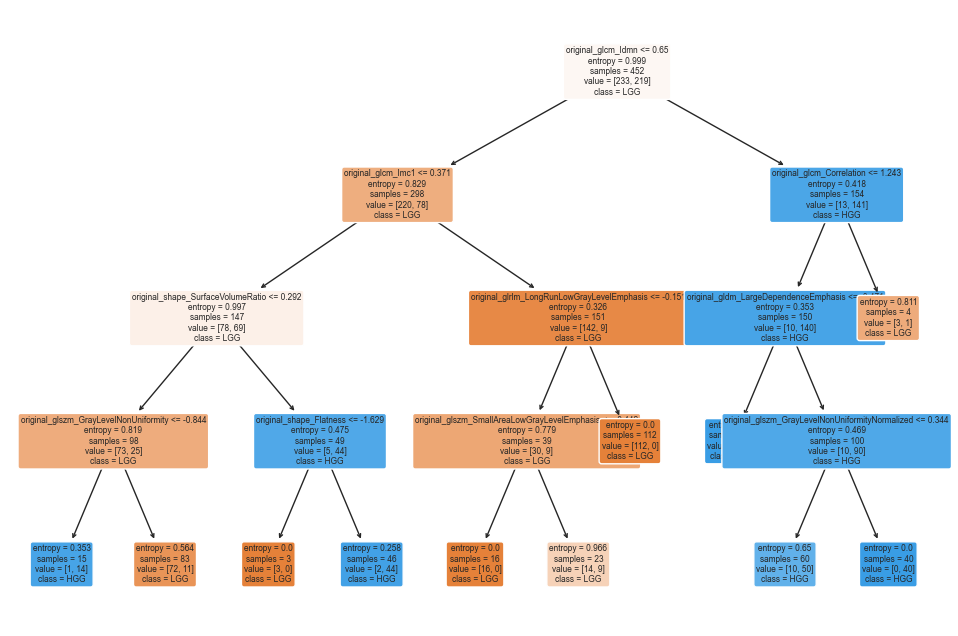

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt1_clf, filled=True, feature_names=X_train1.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [49]:
from sklearn.tree import export_text

# Extract the trained decision tree
tree_model_dt1 = dt1_clf

# Visualize the rules of the tree
tree_rules_dt1 = export_text(tree_model_dt1, feature_names=list(X_train1.columns))
print("Rules of Decision Tree (dt1_clf):\n", tree_rules_dt1)


Rules of Decision Tree (dt1_clf):
 |--- original_glcm_Idmn <= 0.65
|   |--- original_glcm_Imc1 <= 0.37
|   |   |--- original_shape_SurfaceVolumeRatio <= 0.29
|   |   |   |--- original_glszm_GrayLevelNonUniformity <= -0.84
|   |   |   |   |--- class: LGG
|   |   |   |--- original_glszm_GrayLevelNonUniformity >  -0.84
|   |   |   |   |--- class: HGG
|   |   |--- original_shape_SurfaceVolumeRatio >  0.29
|   |   |   |--- original_shape_Flatness <= -1.63
|   |   |   |   |--- class: HGG
|   |   |   |--- original_shape_Flatness >  -1.63
|   |   |   |   |--- class: LGG
|   |--- original_glcm_Imc1 >  0.37
|   |   |--- original_glrlm_LongRunLowGrayLevelEmphasis <= -0.15
|   |   |   |--- original_glszm_SmallAreaLowGrayLevelEmphasis <= -0.44
|   |   |   |   |--- class: HGG
|   |   |   |--- original_glszm_SmallAreaLowGrayLevelEmphasis >  -0.44
|   |   |   |   |--- class: HGG
|   |   |--- original_glrlm_LongRunLowGrayLevelEmphasis >  -0.15
|   |   |   |--- class: HGG
|--- original_glcm_Idmn >  0.65

####  Features selection with PCA

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier
dt2_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {
    'max_depth': list(range(2, 11)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Create GridSearchCV object
CV_dt2_clf = GridSearchCV(estimator=dt2_clf, param_grid=param_grid_dt, cv=5, scoring=scorer)

# Fit the model to the training data
CV_dt2_clf.fit(X_train2, y_train2.diagnostic)

# Print the best parameters and best score
print("Best Parameters:", CV_dt2_clf.best_params_)
print("Best Score:", CV_dt2_clf.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Score: 0.8855499401799285


In [51]:
dt2_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=5,
    random_state=42
)

dt2_clf.fit(X_train2, y_train2.diagnostic)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

In [52]:
dump(dt2_clf, 'DT2.joblib')

['DT2.joblib']

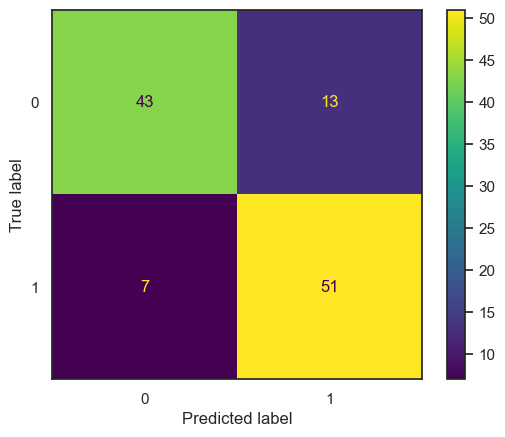

None
              precision    recall  f1-score   support

         HGG       0.86      0.77      0.81        56
         LGG       0.80      0.88      0.84        58

    accuracy                           0.82       114
   macro avg       0.83      0.82      0.82       114
weighted avg       0.83      0.82      0.82       114



In [53]:
dt2_clf = load('DT2.joblib')
y_pred_dt2 = dt2_clf.predict(X_test2)

print(evaluate_classifier(y_pred_dt2, y_test2))
print(classification_report(y_pred_dt2, y_test2))

In [68]:
f1_score(y_test2,y_pred_dt2, average="binary", pos_label="HGG")

0.8113207547169812

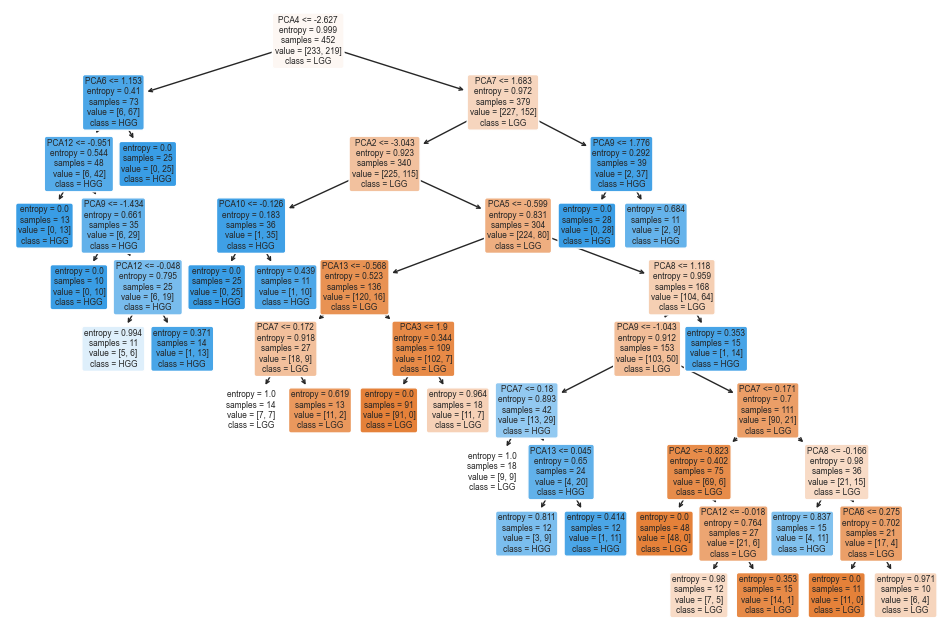

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt2_clf, filled=True, feature_names=X_train2.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [60]:
from sklearn.tree import export_text

tree_model_dt2 = dt2_clf

tree_rules_dt2 = export_text(tree_model_dt2, feature_names=list(X_train2.columns))
print("Rules of Decision Tree (dt2_clf):\n", tree_rules_dt2)


Rules of Decision Tree (dt2_clf):
 |--- PCA4 <= -2.63
|   |--- PCA6 <= 1.15
|   |   |--- PCA12 <= -0.95
|   |   |   |--- class: LGG
|   |   |--- PCA12 >  -0.95
|   |   |   |--- PCA9 <= -1.43
|   |   |   |   |--- class: LGG
|   |   |   |--- PCA9 >  -1.43
|   |   |   |   |--- PCA12 <= -0.05
|   |   |   |   |   |--- class: LGG
|   |   |   |   |--- PCA12 >  -0.05
|   |   |   |   |   |--- class: LGG
|   |--- PCA6 >  1.15
|   |   |--- class: LGG
|--- PCA4 >  -2.63
|   |--- PCA7 <= 1.68
|   |   |--- PCA2 <= -3.04
|   |   |   |--- PCA10 <= -0.13
|   |   |   |   |--- class: LGG
|   |   |   |--- PCA10 >  -0.13
|   |   |   |   |--- class: LGG
|   |   |--- PCA2 >  -3.04
|   |   |   |--- PCA5 <= -0.60
|   |   |   |   |--- PCA13 <= -0.57
|   |   |   |   |   |--- PCA7 <= 0.17
|   |   |   |   |   |   |--- class: HGG
|   |   |   |   |   |--- PCA7 >  0.17
|   |   |   |   |   |   |--- class: HGG
|   |   |   |   |--- PCA13 >  -0.57
|   |   |   |   |   |--- PCA3 <= 1.90
|   |   |   |   |   |   |--- class: 

#### Feature Selection Log Regression

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree classifier
dt3_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {
    'max_depth': list(range(2, 11)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Create the GridSearchCV object
CV_dt3_clf = GridSearchCV(estimator=dt3_clf, param_grid=param_grid_dt, cv=5, scoring=scorer)

# Fit the model
CV_dt3_clf.fit(X_train3, y_train1.diagnostic)

# Print the best parameters and score
print("Best Parameters:", CV_dt3_clf.best_params_)
print("Best Score:", CV_dt3_clf.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.8780263860291313


In [64]:
dt3_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=9,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

dt3_clf.fit(X_train3, y_train2.diagnostic)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [65]:
dump(dt3_clf, 'DT3.joblib')

['DT3.joblib']

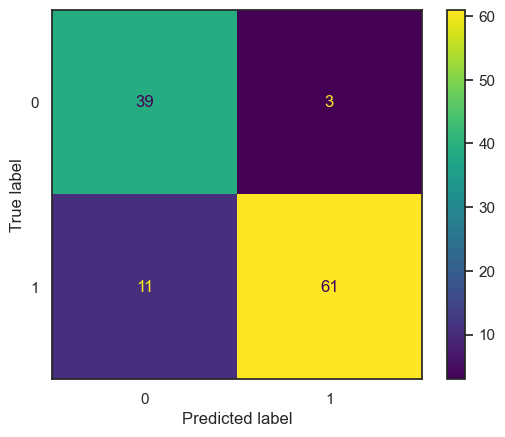

None
              precision    recall  f1-score   support

         HGG       0.78      0.93      0.85        42
         LGG       0.95      0.85      0.90        72

    accuracy                           0.88       114
   macro avg       0.87      0.89      0.87       114
weighted avg       0.89      0.88      0.88       114



In [66]:
dt3_clf = load('DT3.joblib')
y_pred3 = dt3_clf.predict(X_test3)

print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

In [69]:
f1_score(y_test1,y_pred3, average="binary", pos_label="HGG")

0.8478260869565217

Variable Importance Plot - Global Interpretation


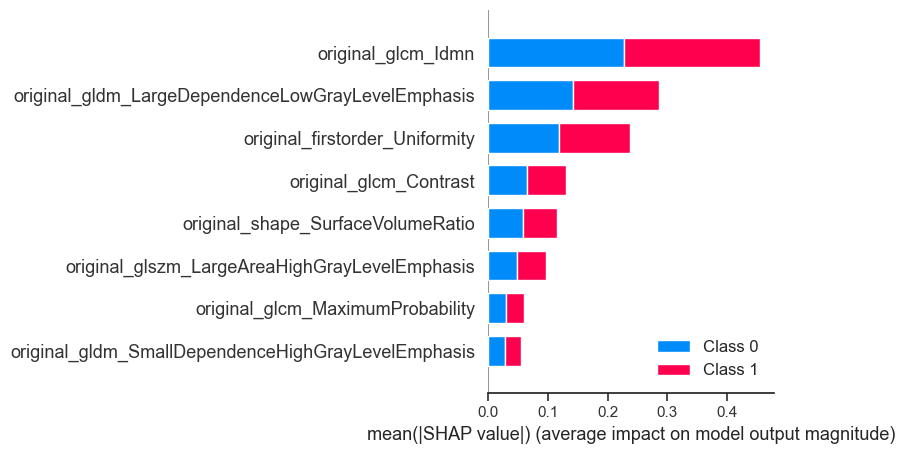

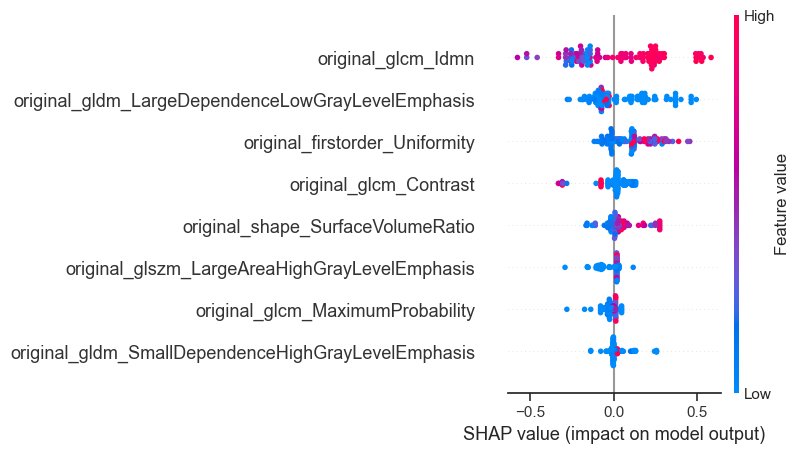

In [72]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer_dt = shap.TreeExplainer(dt3_clf)
shap_values_dt = explainer_dt.shap_values(X_test3)

# Plot summary plots
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values_dt, X_test3)
shap.summary_plot(shap_values_dt[1], X_test3)

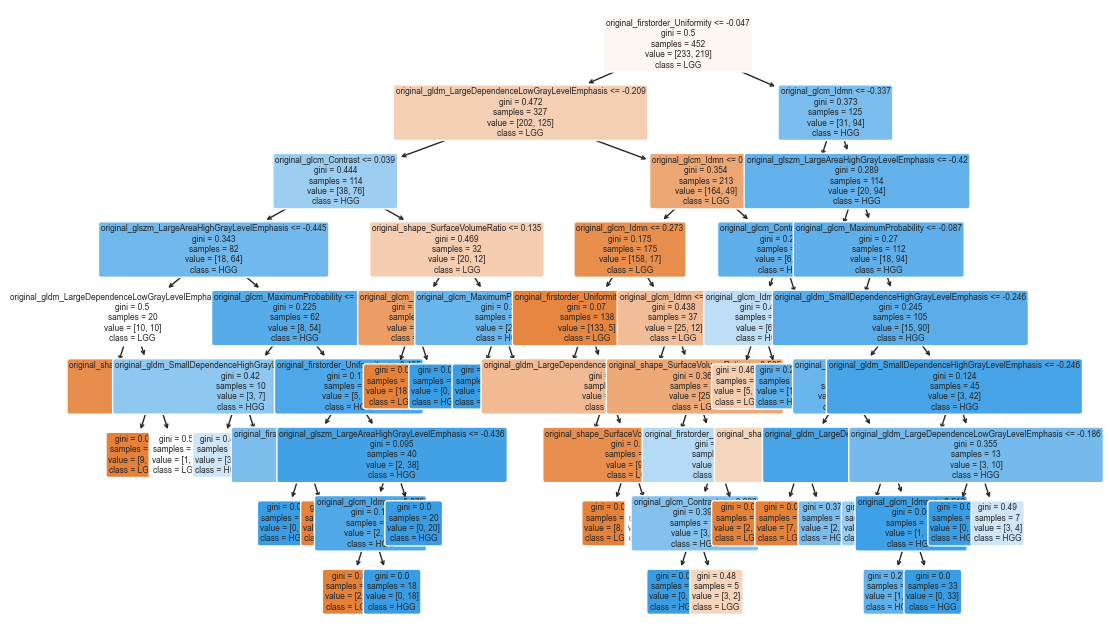

In [70]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt3_clf, filled=True, feature_names=X_train3.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [73]:
from sklearn.tree import export_text
tree_model_dt3 = dt3_clf

tree_rules_dt3 = export_text(tree_model_dt3, feature_names=list(X_train3.columns))
print("Rules of Decision Tree (dt3_clf):\n", tree_rules_dt3)

Rules of Decision Tree (dt3_clf):
 |--- original_firstorder_Uniformity <= -0.05
|   |--- original_gldm_LargeDependenceLowGrayLevelEmphasis <= -0.21
|   |   |--- original_glcm_Contrast <= 0.04
|   |   |   |--- original_glszm_LargeAreaHighGrayLevelEmphasis <= -0.45
|   |   |   |   |--- original_gldm_LargeDependenceLowGrayLevelEmphasis <= -0.21
|   |   |   |   |   |--- class: LGG
|   |   |   |   |--- original_gldm_LargeDependenceLowGrayLevelEmphasis >  -0.21
|   |   |   |   |   |--- original_shape_SurfaceVolumeRatio <= 1.12
|   |   |   |   |   |   |--- class: HGG
|   |   |   |   |   |--- original_shape_SurfaceVolumeRatio >  1.12
|   |   |   |   |   |   |--- class: HGG
|   |   |   |--- original_glszm_LargeAreaHighGrayLevelEmphasis >  -0.45
|   |   |   |   |--- original_glcm_MaximumProbability <= -0.47
|   |   |   |   |   |--- original_gldm_SmallDependenceHighGrayLevelEmphasis <= -0.04
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |   |--- original_gldm_SmallDependenceHighGrayLeve